<a href="https://colab.research.google.com/github/Melissa1221/Proyecto_Fundamentos/blob/main/Informe_simulador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simulador de Incendios Forestales en Python**
Integrantes:


*   Carrillo Jordan Sandro Alfredo
*   Condor Mendez Cadney Veliana
*   Iman Noriega Melissa
*   Rosado Silva Hernan Arturo

El lenguaje de programación utilizado en este proyecto es Python.



## RESUMEN

Los incendios forestales son un problema grave que afecta al medio ambiente y a la salud de las personas y los animales. Según el informe de WWF1, los incendios forestales aumentarán un 30% para 2050 y más de un 50% para fin de siglo debido a la crisis climática, que provoca sequías, olas de calor y cambios de uso de la tierra. Algunos de los problemas que causan los incendios forestales son:

- Acaban con la vida silvestre y la vegetación.
- Dañan el suelo exponiéndolos a la erosión.
- Favorecen las inundaciones y los desplazamientos de tierra.
- Aumentan los niveles de dióxido de carbono en la atmósfera y contribuyen al cambio climático.
- Causan pérdidas de vidas humanas y bienes materiales.

Para prevenir y reducir el riesgo de incendios forestales, se necesita un cambio de estrategia basado en la prevención, la preparación y la asignación adecuada de los presupuestos, así como el fortalecimiento del compromiso global para combatir el cambio climático

El objetivo de este proyecto es desarrollar un simulador de incendios forestales en Python, que permita modelar la dinámica de propagación del fuego en un paisaje forestal heterogéneo. El simulador se basa en una matriz bidimensional que representa el terreno, donde cada celda puede contener un árbol, un lago o estar vacía. Los árboles tienen diferentes tipos y probabilidades de incendiarse. Los lagos actúan como barreras que impiden el avance del fuego.
El simulador permite visualizar gráficamente el estado del terreno y fuego en cada instante, hasta eventualmente, quemarse.

Se realizaron pruebas con distintos tipos de árboles, variando las probabilidades de incendiarse, también con distintas tasas de crecimiento e implementando lagos para visualizar la variación en la propagación del incendio.









## INTRODUCCIÓN
1. Acerca de nuestro problema:

Un incendio forestal es la propagación libre, no programada y descontrolada del fuego sobre la vegetación. Los efectos que generan en la naturaleza son:
- Flora y fauna

  Se destruyen la biodiversidad del ecosistema, disminuyendo la población de las especies que habitan en ella o extinguiéndolas, esto dependerá mucho de la tasa de generación que posea cada especie, además de su adaptabilidad.
- Suelo
  
  Los incendios forestales degradan el suelo; y afectan su actividad biológica, desestabilizando su ciclo de nutrientes. La intensidad de la degradación depende de la topología del lugar, la intensidad de la erosión, la tasa de regeneración de la cubierta vegetal, recurrencia y duración del incendio
- Agua

   Se produce una disminución en las tasas de infiltración, disponibilidad de agua y aumento de escurrimiento. Las cenizas pueden aumentar la capacidad de infiltración y prevenir o retrasar la escorrentía hasta ciertas cantidades e intensidades de precipitaciones.
- Clima
  
  El clima se ve alterado con menos plantas que generen oxígeno. El humo, producto de la combustión, contiene carbono y otros elementos que, en grandes cantidades son nocivos al medio ambiente. En consecuencia, se produce un incremento del efecto invernadero.

En conjunto, pueden producir la desertificación del ecosistema, una disminución de recursos, como la materia prima y alimentos, que dependemos; y menor disponibilidad de agua.

La causa y la intensidad de sus efectos dependen en gran medida de las cualidades físicas y biológicas que posea el ecosistema, tales como las características del clima. Estas características incluyen la temperatura, la velocidad y la dirección del viento, así como el nivel de humedad en el suelo y en la atmósfera, y la duración de los períodos secos. No solo causan los incendios forestales, sino que también dificultan su extinción. También se encuentran la caracteristicas de la forestación y de la topología del lugar.

A partir de lo mencionado, usando el lenguaje de programación Python, construiremos una simulación en una matriz bidimensional donde cada celda puede contener un árbol, un lago o estar vacía. La simulación simplificará las diversas causas naturales por las que se pueden generar un incendio dotando a cada tipo de árbol una probabilidad de incendiarse y una probabilidad de quemarse debido a a su vecino quemado; además, se tiene la tasa de generación del bosque. Los lagos actúan como barreras que impiden el avance del fuego. El simulador permite visualizar gráficamente el estado del terreno y fuego en cada instante, hasta eventualmente, quemarse.
2. Objetivos:

Los objetivos para este proyecto son:
- Crear una simulación teniendo en cuenta por algunos factores de provocación de incendios.

- Analizar mediante la simulación, el comportamiento del bosquejo variando las probabilidades de que un árbol se incendie por un vecino y la tasa de crecimiento de los árboles.

- Ampliar nuestros conocimientos en programación.


### LEYENDA

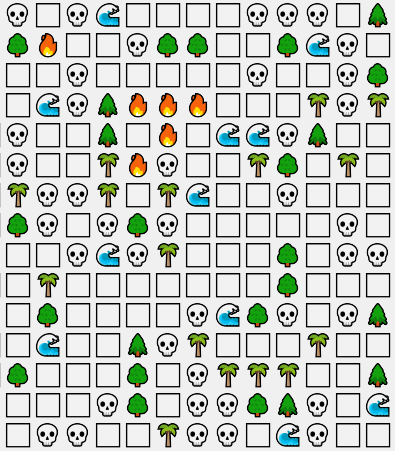

Figura 1: Imagen referencial para la leyenda.

⬜: Espacio vacío

🌲: Árbol 1

🌴: Árbol 2

🌳: Árbol 3

🔥: Árbol quemándose

💀: Árbol quemado

🌊: Lago

## IMPLEMENTACIÓN Y DEMOSTRACIÓN DE RESULTADOS

1. Implementación realizada

-*Importación de las librerías y funciones utilizadas.*

In [ ]:
import random
from PIL import Image, ImageDraw, ImageFont, ImageTk
import tkinter as tk

-*Función que crea y retorna una imagen de emoji dados el tamaño y el emoji correspondientes.*

In [ ]:
def emoji_img(tamaño, texto):
    fuente = ImageFont.truetype("seguiemj.ttf", size=round(tamaño*3/4))
    im = Image.new("RGBA", (tamaño, tamaño), (255, 255, 255, 0))
    dibujar = ImageDraw.Draw(im)
    dibujar.text((tamaño/2, tamaño/2), texto, embedded_color=True, font=fuente, anchor="mm")
    return ImageTk.PhotoImage(im)

*Este código ha sido adaptado de: https://stackoverflow.com/questions/66183690/how-to-display-colored-emojis-in-tkinter*

Explicando cada línea de la función:

1.*fuente = ImageFont.truetype("seguiemj.ttf", size=round(tamaño * 3/4))*

El primer parámetro que recibe el método ImageFont.truetype() es la cadena "seguiemj.ttf"; esta cadena representa el nombre del archivo TrueType(.ttf). Cabe resaltar que no es necesario tener el archivo dentro de la carpeta del proyecto, ya que, en Windows, busca el archivo en la ruta C:\Windows\Fonts.

El segúndo parámetro es el tamaño de la fuente, el método recibe este tamaño en puntos, por lo que se debe hacer la conversión de píxeles a puntos, se sabe que 3 puntos equivalen a 4 píxeles, por lo tanto se multiplica size por el factor 3/4, además se usa la función round() para redondear este resultado al entero más cercano.

Finalmente, este método retorna un objeto *ImageFont* que se le asigna a la variable *fuente*.

2.*im = Image.new("RGBA", (tamaño, tamaño), (255, 255, 255, 0))*

El método Image.new() retorna una instancia de la clase *Image*, y esta se le asigna a la variable *im*. Este método recibe como parámetros el modo de color RGBA, el tamaño de la imagen como tupla, y el color del fondo de la imagen como tupla.

3.*dibujar = ImageDraw.Draw(im)*

El método ImageDraw.Draw() instancia un objeto *ImageDraw* con el que se dibuja en la imagen *im* y lo asigna a la variable *dibujar*.

4.*dibujar.text((tamaño/2, tamaño/2), texto, embedded_color=True, font=fuente, anchor="mm")*

El método ImageDraw.text() dibuja el contenido de la variable *texto* con respecto al punto de referencia situado en la posición (tamaño/2, tamaño/2), esta posición es relativa a la esquina superior izquierda, por lo que el punto de referencia se sitúa en el medio de la imagen. Además se le pasa una fuente para el texto, y por medio del parámetro *anchor* se especifica que la  alineación es con respecto al centro y en ambas direcciones. Por último se establece el parámetro embedded_color como True para que se incluyan los colores incorporados en la fuente.




-*Declaración e inicialización de las variables y estructuras a usar, y configuración de la interfaz gráfica y el lienzo de dibujo.*

In [ ]:
n = 30
m = 30

ventana = tk.Tk()
ventana.title("Simulación de Bosque")
ventana.geometry("900x900")
canvas = tk.Canvas(ventana, width=m*30, height=n*30)
canvas.pack()


tasa_crecimiento = 0.01

probabilidad_quemarse_vecino = 0.05

tiempo_quemado_necesario = 5

VACIO = '⬜'
ARBOL1 = '🌲'
ARBOL2 = '🌴'
ARBOL3 = '🌳'
FUEGO = '🔥'
LAGO = '🌊'
QUEMADO = '💀'

emoji_arbol1 = emoji_img(30, ARBOL1)
emoji_arbol2 = emoji_img(30,ARBOL2 )
emoji_arbol3 = emoji_img(30, ARBOL3)
emoji_vacio = emoji_img(30, VACIO)
emoji_fuego = emoji_img(30, FUEGO)
emoji_lago = emoji_img(30, LAGO)
emoji_quemado = emoji_img(30, QUEMADO)


probabilidad_quemarse = {
    emoji_arbol1: 0.04,
    emoji_arbol2: 0.01,
    emoji_arbol3: 0.02
}

bosque = [[emoji_vacio] * m for _ in range(n)]
tiempo_quemado = [[0] * m for _ in range(n)]


-*Función que actualiza el lienzo de dibujo a partir de los datos actuales de la lista* ***bosque***.

In [ ]:
def dibujar_bosque():
    canvas.delete("all")

    for i in range(n):
        for j in range(m):
            x1 = j * 30
            y1 = i * 30
            x2 = x1 + 30
            y2 = y1 + 30

            estado = bosque[i][j]


            canvas.create_image((x1 + x2) // 2, (y1 + y2) // 2, image=estado, anchor="center")

-*Función que obtiene los vecinos en los 8 espacios alrededor del elemento en la lista, es decir, los vecinos en la horizontal, vertical y diagonales.*

In [ ]:
def obtener_vecinos(i, j):
    vecinos = []
    for dx in range(-1, 2):
        for dy in range(-1, 2):
            if dx == 0 and dy == 0:
                continue
            ni = i + dx
            nj = j + dy
            if 0 <= ni < n and 0 <= nj < m:
                vecinos.append((ni, nj))
    return vecinos

-*Generación de los lagos.*

In [ ]:
num_lagos = random.randint(20, 40)
for _ in range(num_lagos):
    i = random.randint(0, n - 1)
    j = random.randint(0, m - 1)
    bosque[i][j] = emoji_lago

-*Función que retorna un booleano para saber si terminar la simulación.*

In [ ]:
def SimulaciónTerminada():
    for i in range (n):
        for j in range(m):
            if bosque[i][j]!=emoji_quemado and bosque[i][j] != emoji_lago:
                return False
    return True

Verifica si todos los elementos de la lista **bosque** son **emoji_quemado** o **emoji_lago**, si es que encuentra al menos un elemento diferente a ellos, retorna **False**, de otro modo, retorna **True**.

-*Función recursiva que ejecuta la simulación.*

In [ ]:
def Simulación():
    for i in range(n):
        for j in range(m):
            if bosque[i][j] == emoji_vacio and random.random() < tasa_crecimiento:
                tipo_arbol = random.choice([emoji_arbol1, emoji_arbol2, emoji_arbol3])
                bosque[i][j] = tipo_arbol

    for i in range(n):
        for j in range(m):
            if bosque[i][j] in [emoji_arbol1, emoji_arbol2, emoji_arbol3] and random.random() < probabilidad_quemarse[bosque[i][j]]:
                bosque[i][j] = emoji_fuego
                tiempo_quemado[i][j] = 1
            elif bosque[i][j] == emoji_fuego:
                vecinos = obtener_vecinos(i, j)
                for ni, nj in vecinos:
                    if bosque[ni][nj] in [emoji_arbol1, emoji_arbol2, emoji_arbol3] and random.random() < probabilidad_quemarse_vecino:
                        bosque[ni][nj] = emoji_fuego
                        tiempo_quemado[i][j] = 1

    for i in range(n) :
        for j in range (m):
            if bosque[i][j] == emoji_fuego:
                tiempo_quemado[i][j] += 1
                if tiempo_quemado[i][j] >= tiempo_quemado_necesario:
                    bosque[i][j] = emoji_quemado
    dibujar_bosque()
    if SimulaciónTerminada()== True:
        print("Simulación terminada.")
        return
    ventana.after(100, Simulación)



*   Se hace uso de la variable *tasa_crecimiento* para hacer crecer los árboles del diccionario *probabilidad_quemarse* para establecer el fuego.

*   Se hace uso del diccionario *probabilidad_quemarse* para establecer el fuego en un casillero.

*   Se hace uso de la variable *probabilidad_quemarse_vecino* para la propagación del fuego.

*   Con ayuda de la lista *tiempo_quemado* se cambia el estado de quemándose a quemado teniendo en cuenta el número de iteraciones que ha iterado la función desde que el árbol comenzó a quemarse.
*   Se actualiza el lienzo de dibujo con la función *dibujar_bosque()*


*   Se verifica si se cumplen las condiciones necesarias para terminar la simulación, de ser así, la termina.

*   La función se llama a sí misma luego de un intervalo de tiempo de 100 milisegundos.







1. ### **Demostración de resultados**
-*Función emoji_img()*.

Se observa el funcionamiento de los emojis a color, de la interfaz gráfica y del lienzo de dibujo mediante la siguiente imagen.

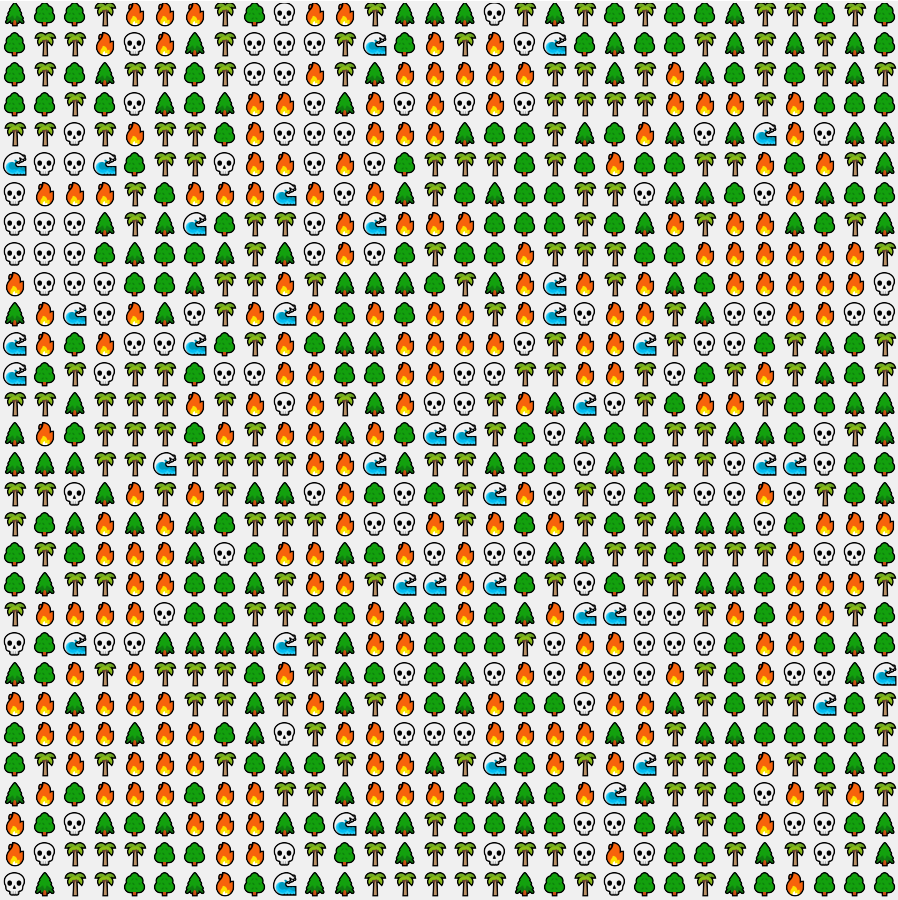

Figura 2: Funcionalidad de los emojis a color en la interfaz gráfica.

-*Generación de lagos*.

Se lleva a cabo la generación de lagos en el momento en el que se inicia la simulación, y debido a que los lagos no se queman, evita que se quemen los árboles que están en la dirección opuesta a la de la propagación del fuego.

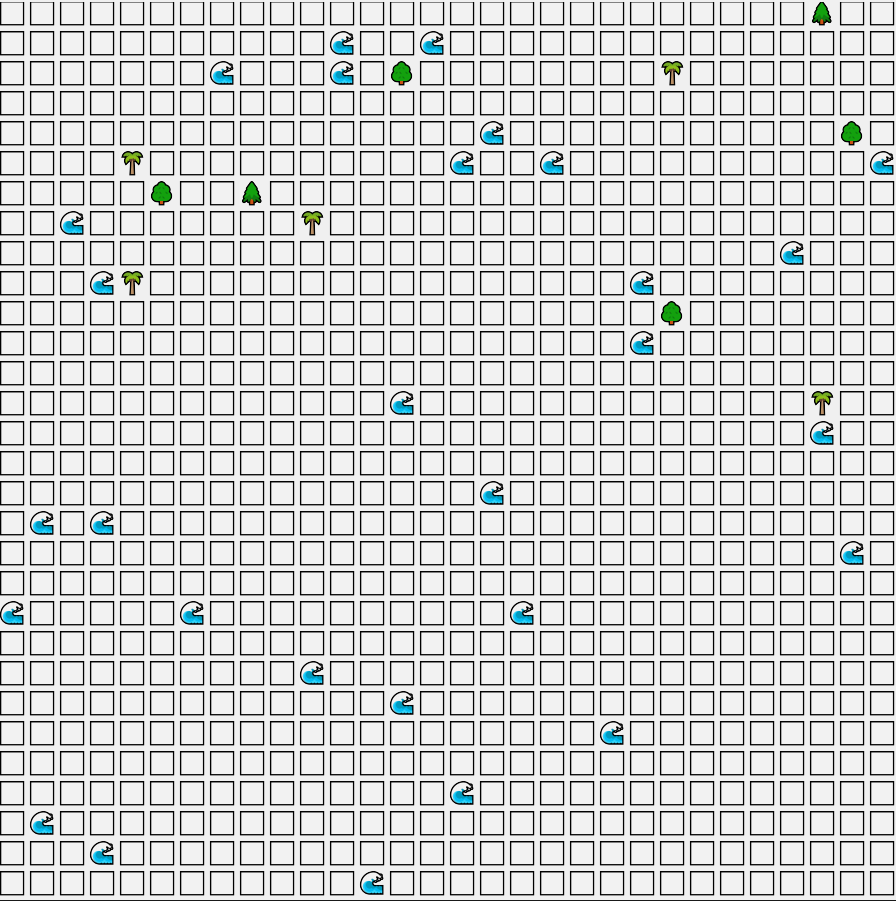

Figura 2: Lagos en la primera iteración de la simulación.

-*Funcionalidad de la función dibujar_bosque(), obtener_vecinos() y Simulación()*.

Se demuestra mediante las siguientes imágenes el crecimiento de árboles, la actualización del lienzo y la propagación del fuego.


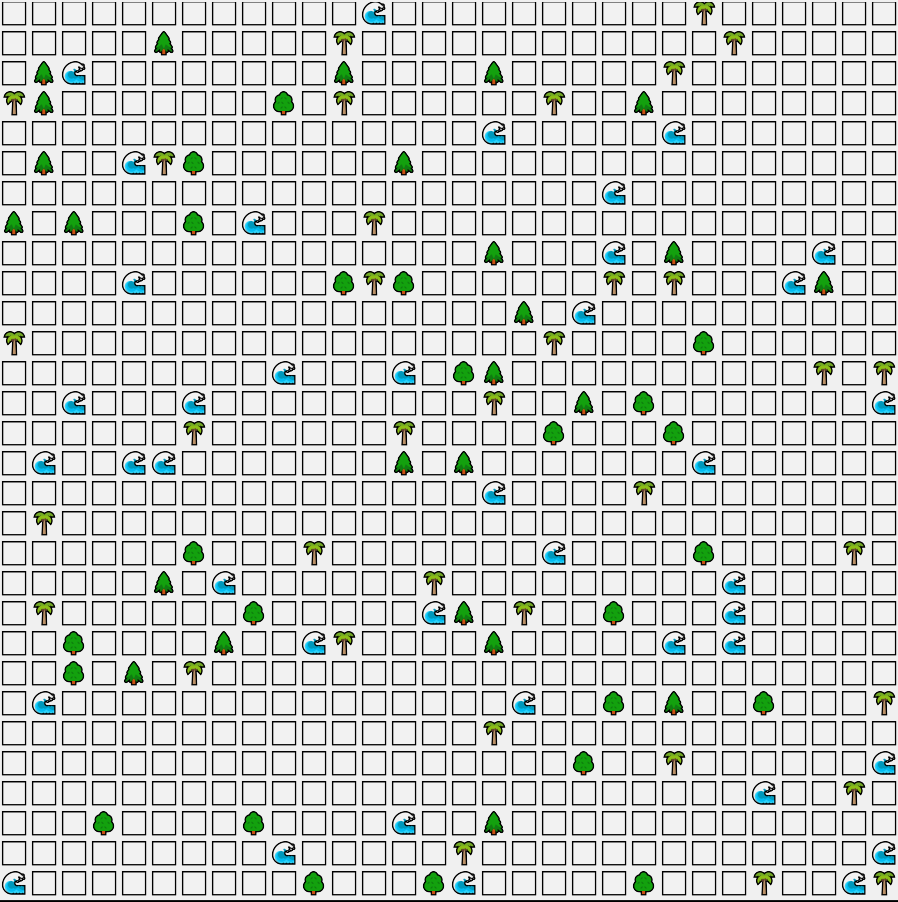

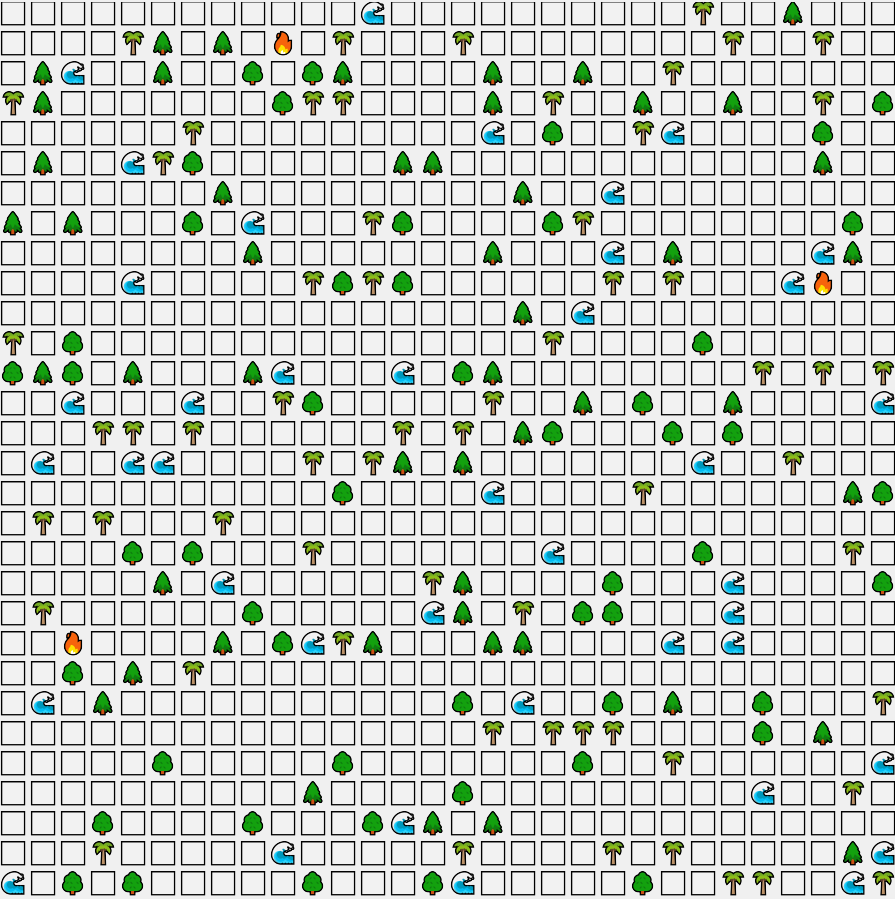

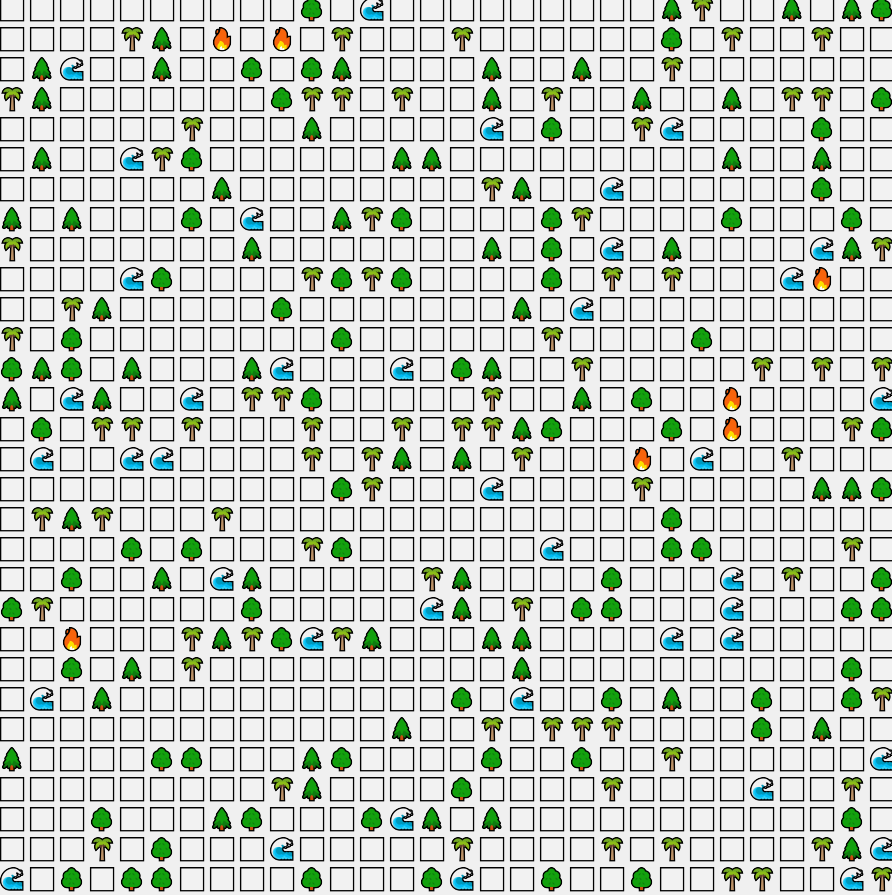

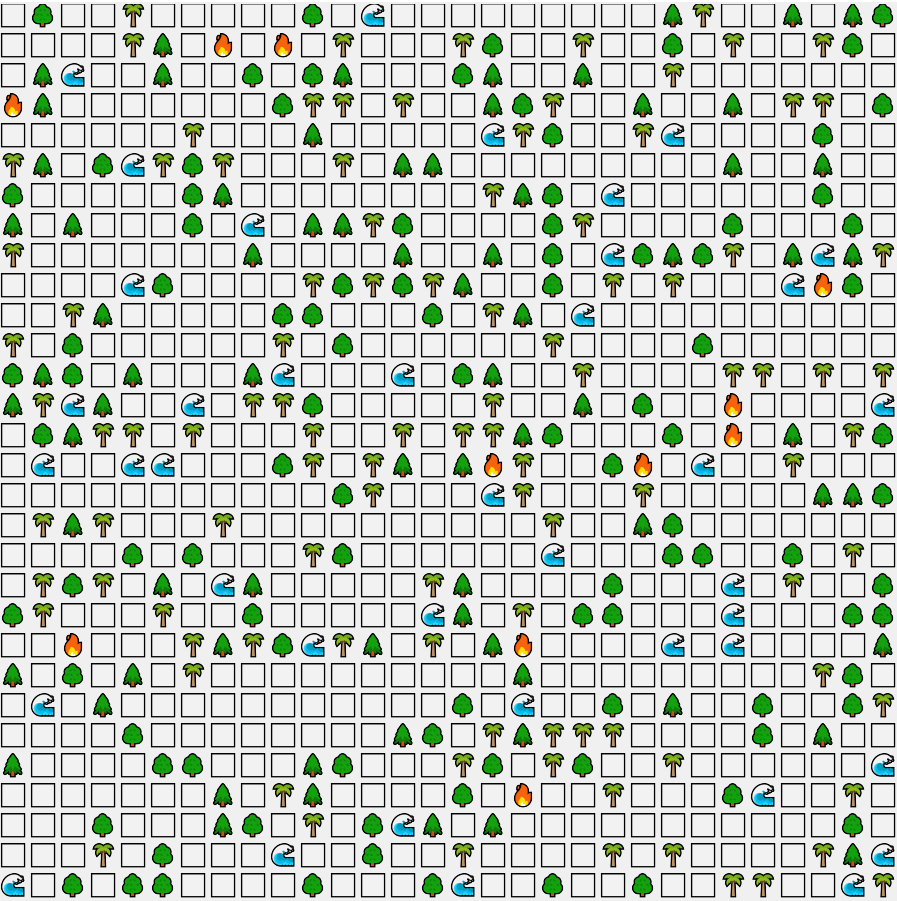

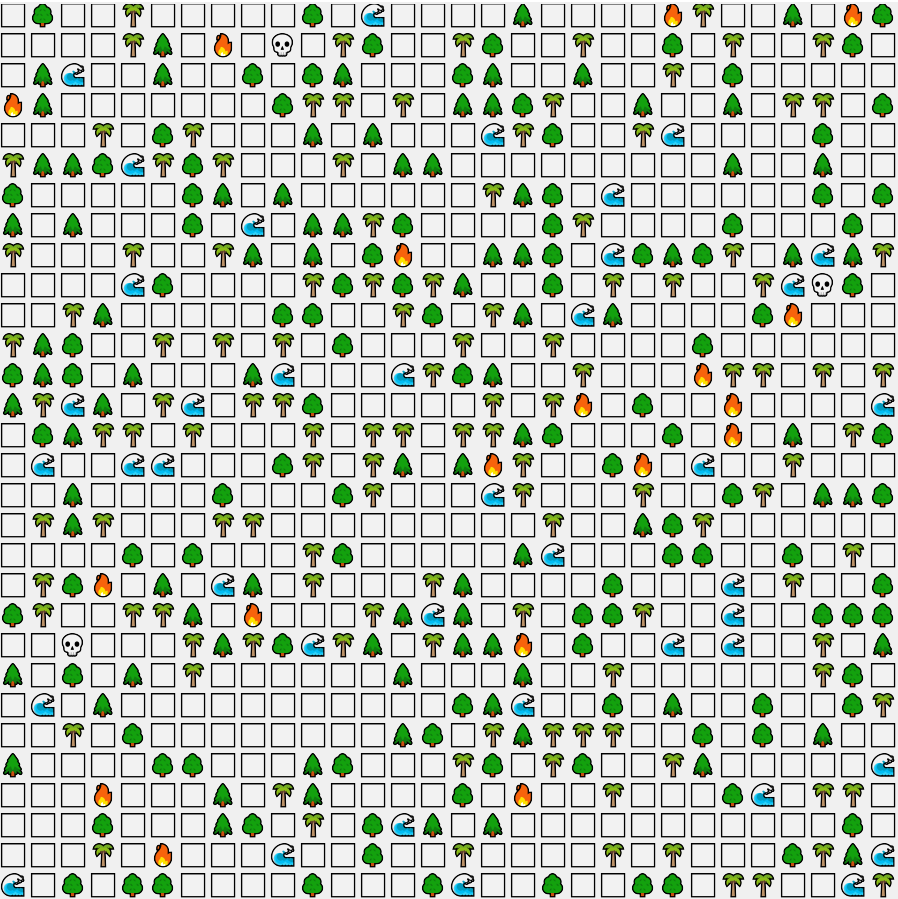

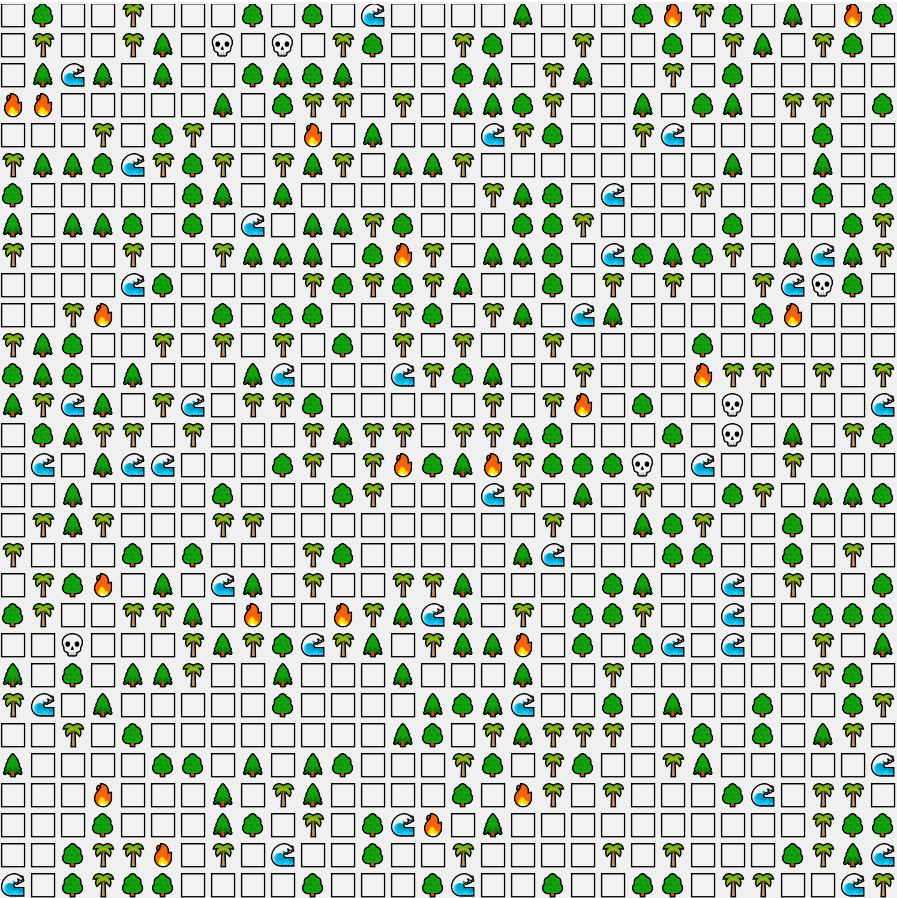

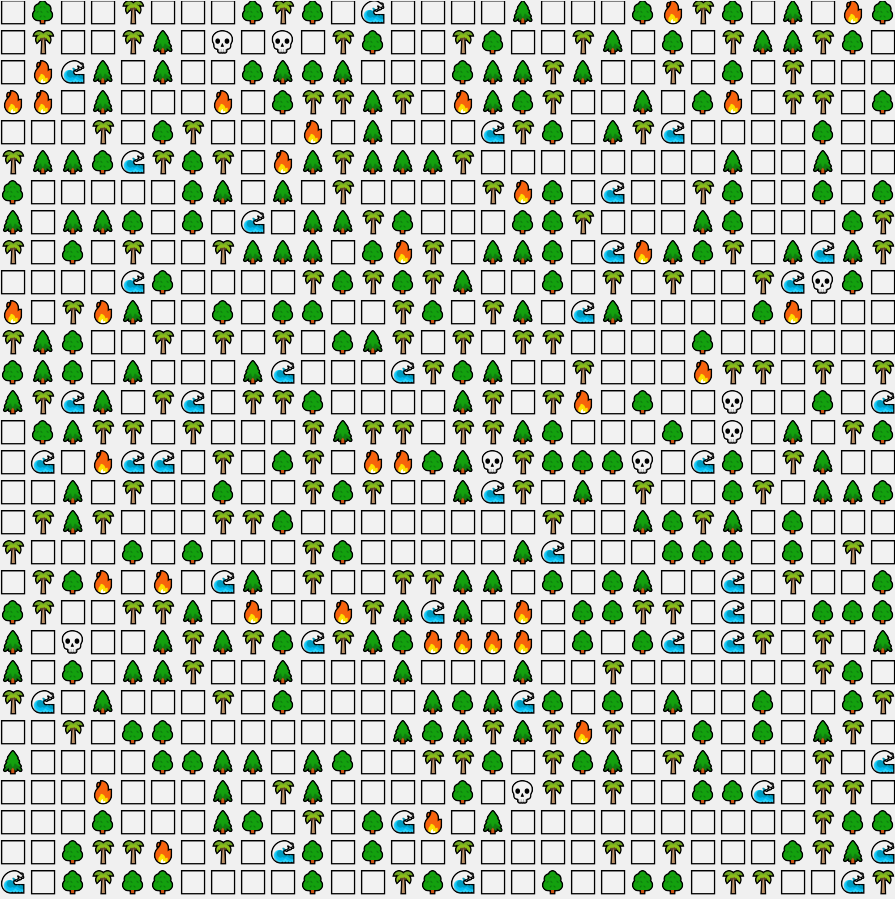

Figura 4: Imágenes de la simulación en iteraciones consecutivas.

*Finalización de la simulación*.

Se detecta mediante un mensaje impreso en consola que la simulación ha terminado.

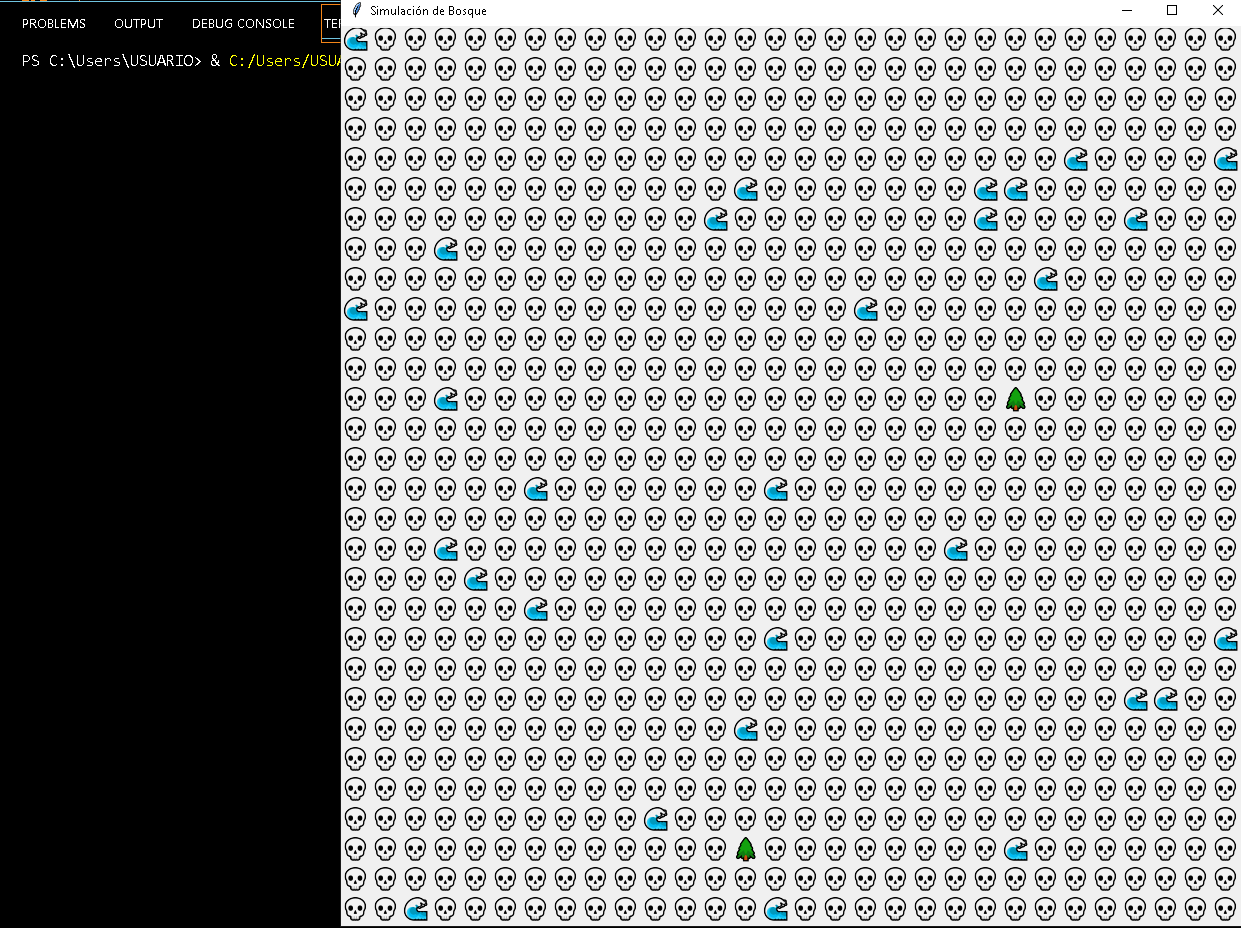

Figura 5: Imagen tomada justo antes de que la simulación acabe.

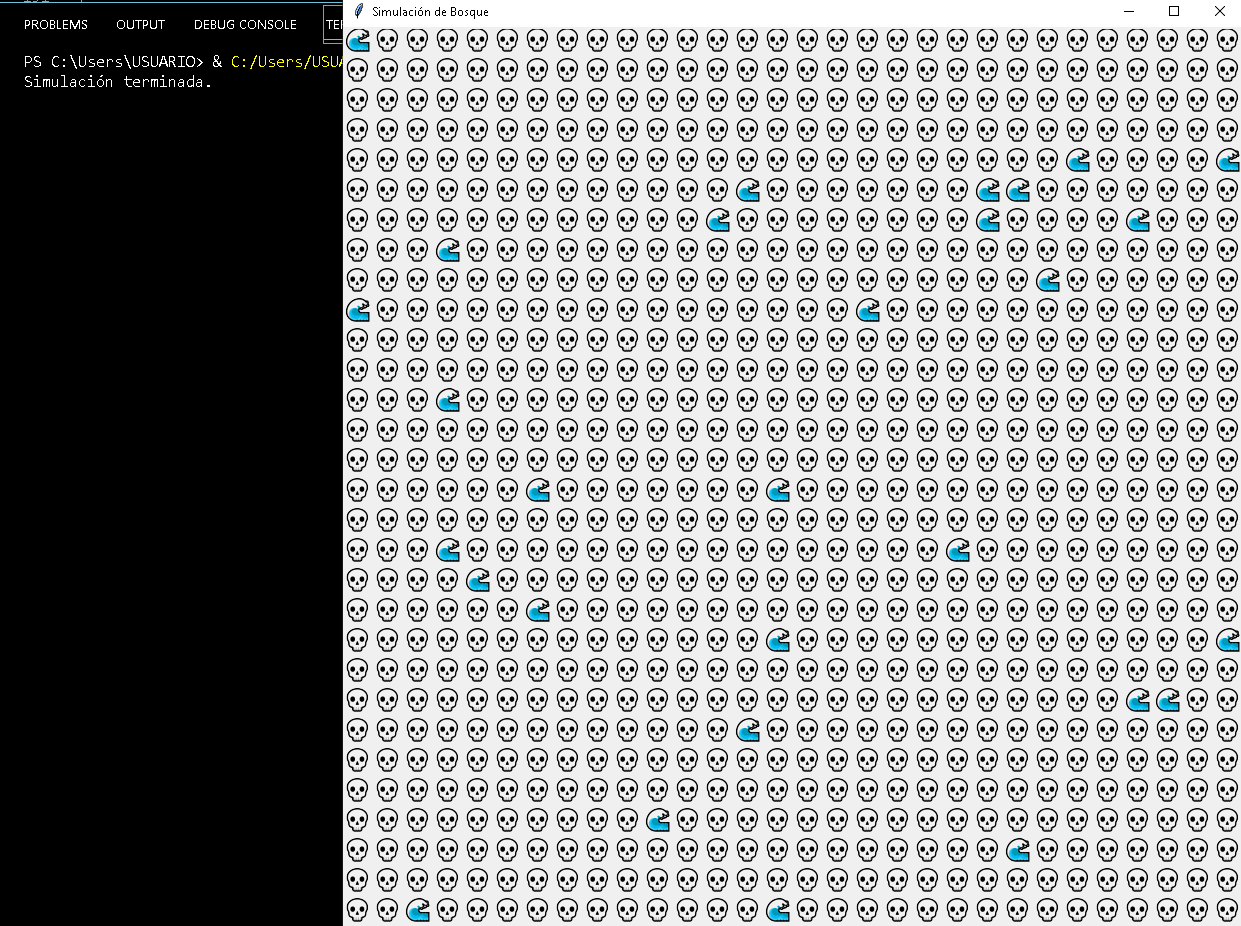

Figura 6 : Imagen tomada en el momento que acabó la simulación.

## **PRUEBAS**






*   Prueba para la implementación del los lagos:

Al realizar la simulación, se requiere que sea lo más realista posible.En un caso real de un incendio forestal, el fuego no afecta a los lagos o los ríos. En el código se implementó dicha condición.
A continuación la prueba con lagos representados por emojis de la misma forma.




In [ ]:
  for j in range(m):
            if bosque[i][j] in [emoji_arbol1, emoji_arbol2, emoji_arbol3] and random.random() < probabilidad_quemarse[bosque[i][j]]:
                bosque[i][j] = emoji_fuego
                tiempo_quemado[i][j] = 1
            elif bosque[i][j] == emoji_fuego:
                vecinos = obtener_vecinos(i, j)
                for ni, nj in vecinos:
                    if bosque[ni][nj] in [emoji_arbol1, emoji_arbol2, emoji_arbol3] and random.random() < probabilidad_quemarse_vecino:
                        bosque[ni][nj] = emoji_fuego
                        tiempo_quemado[i][j] = 1


En este fragmento del código notamos que el fuego solo afecta a "emoji_arbol1, emoji_arbol2 y emoji_arbol3", por tanto el emoji que representa el lago no cambia su estado.
En el siguiente ejemplo, se puede notar el inicio del incendio, asimismo, también se muestra la posición de los lagos asignados aleatoriamente.

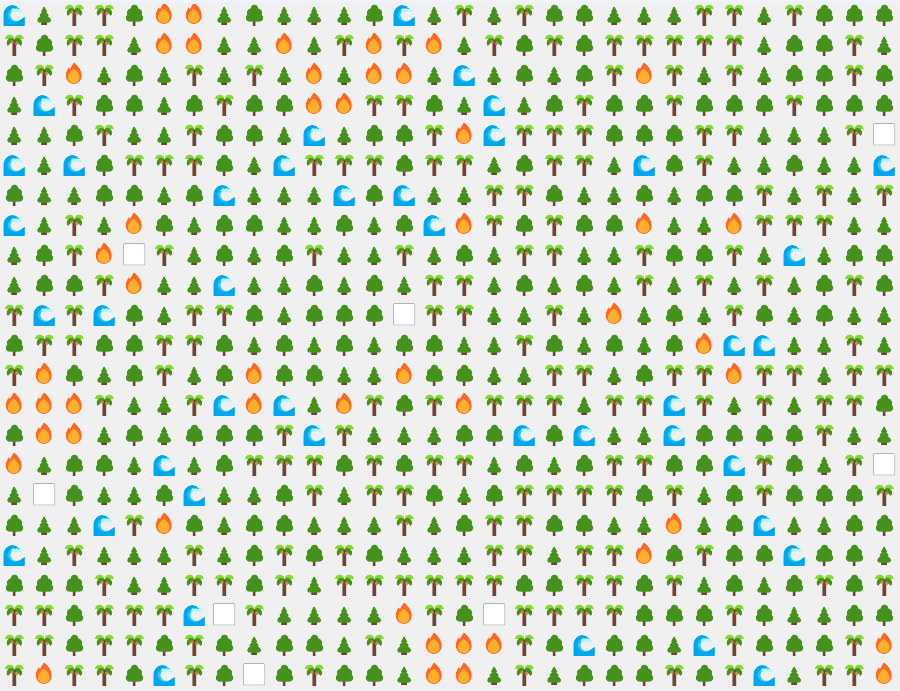

Figura 7: Estado inicial correspondiante a la prueba de los lagos

Cuando termina la simulación, se puede visualizar en la siguiente imagen que la posición de los lagos representados con los emojis de la misma forma permanecen en su estado inicial. Concluyendo con una prueba exitosa para la implementación de los lagos.

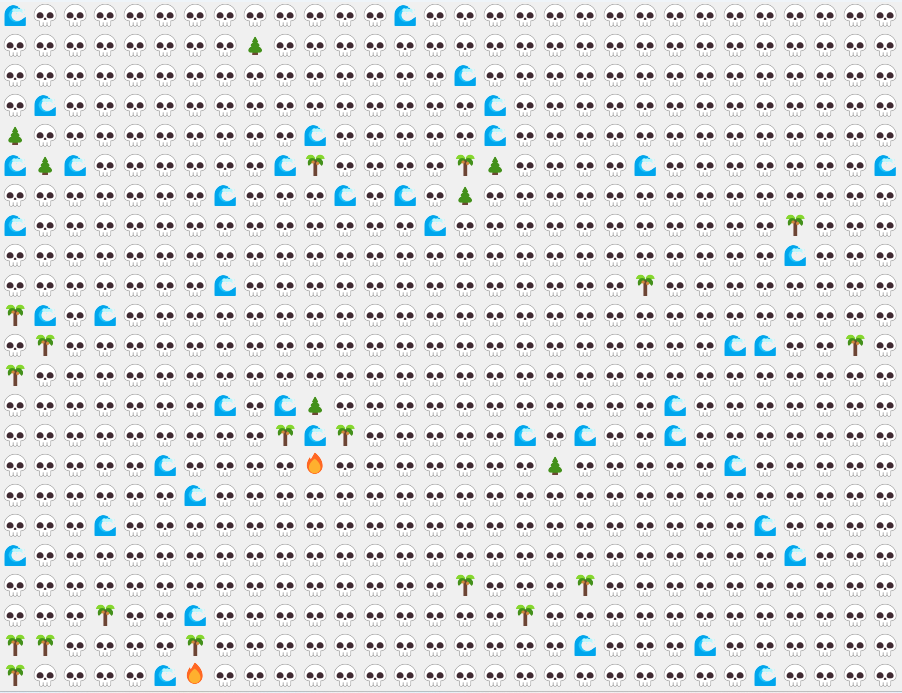

Figura 8: Estado final correspondiente de la prueba de los lagos



*   Prueba de la probabilidades

Como se mencionó, la simulación parte de la probalidad que existe de que caiga un rayo sobre un árbol, de allí parte la probabilidad que tiene ese árbol de incendiase y de incendiar a sus vecinos dependiendo del tipo de árbol a considerar.

### PRUEBA 1:

En la primera prueba, se tomaron las siguientes probabiblidades, teniendo establecido 5 segundos como el tiempo de duración del fuego:

*   Tasa de crecimiento: 0.5
*   Probalibilidad de incendio del árbol: 0.5

En la implementación también se consideró, 3 distintos tipos de árbol, a los cuales asignamos una probabilidad de incendio.


*   Probabilidad árbol 1 🌲=  0.1
*   Probabilidad árbol 2 🌴=  0.05
*   Probabilidad árbol 3 🌳=  0.2





In [ ]:
[...]
tasa_crecimiento = 0.5

probabilidad_quemarse_vecino = 0.5

tiempo_quemado_necesario = 5
[...]

[...]
probabilidad_quemarse = {
    emoji_arbol1: 0.1,
    emoji_arbol2: 0.05,
    emoji_arbol3: 0.2,
}
[...]


En la siguiente imagen, se puede observar que el incendio (emoji fuego) y el crecimiento de los árboles se desarrollan simultáneamente. Además no se aprecia el inicio del incendio.

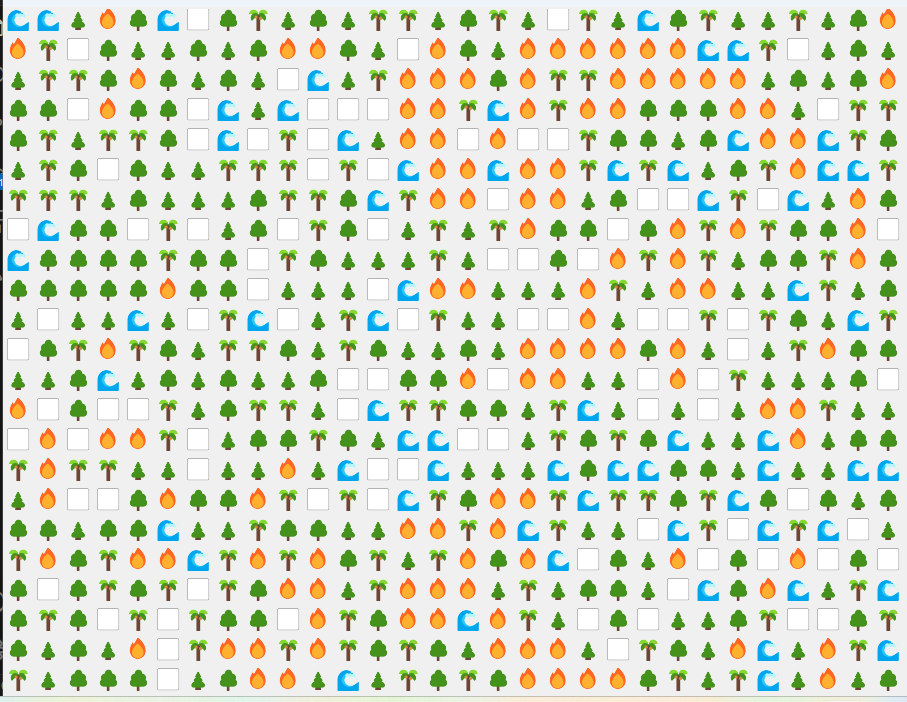

Figura 9: Estado inicial de la prueba 1

Al final de la simulación, se puede observar diferencia de probabilidades, pues en la imagen se observa más cantidad del árbol de palmera, ya que le corresponde la probabilidad más baja. Dando un resultado exitoso para la prueba de las probabilidades de los distintos tipos de árbol.

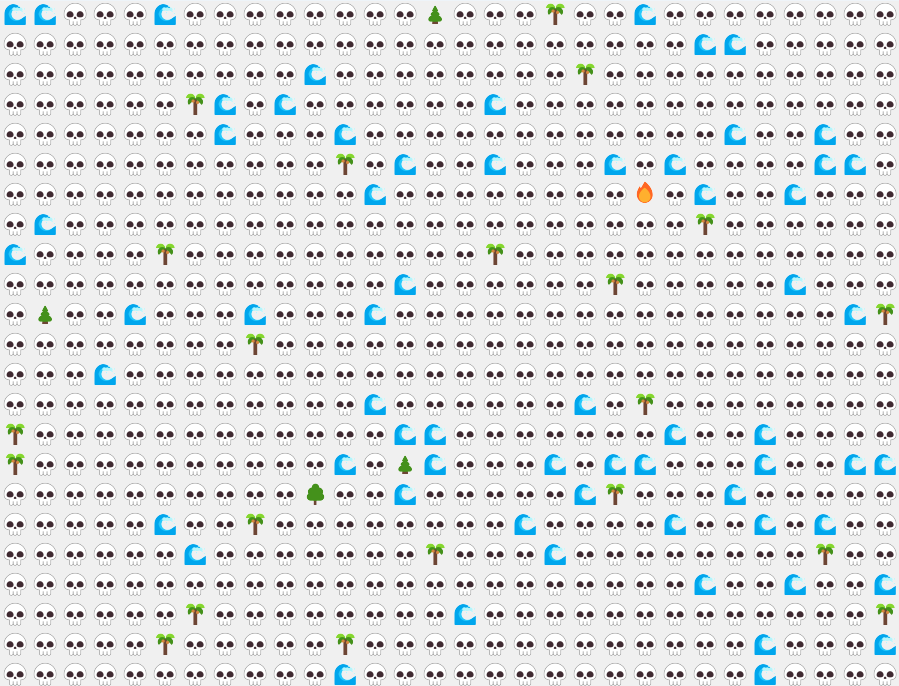

Figura 10: Estado final de la prueba 1

### PRUEBA 2:

Para la segunda prueba, se consideró cambiar la tasa de crecimiento de un árbol.
Con base a la primera prueba, se redujo la tasa de crecimiento  a 0.01 para hacer más evidente el inicio   

*   Tasa de crecimiento: 0.01
*   Probalibilidad de incendio del árbol vecino : 0.5

En esta segunda prueba, se mantendrá constante la probabilidad de incendiarse de cada árbol.


In [ ]:
[...]
tasa_crecimiento = 0.01

probabilidad_quemarse_vecino = 0.5

tiempo_quemado_necesario = 5 [...]



Al implementar esas probabilidades a en el código, podemos apreciar mejor el inicio del incendio, así como la tasa de cremiento de cada árbol.

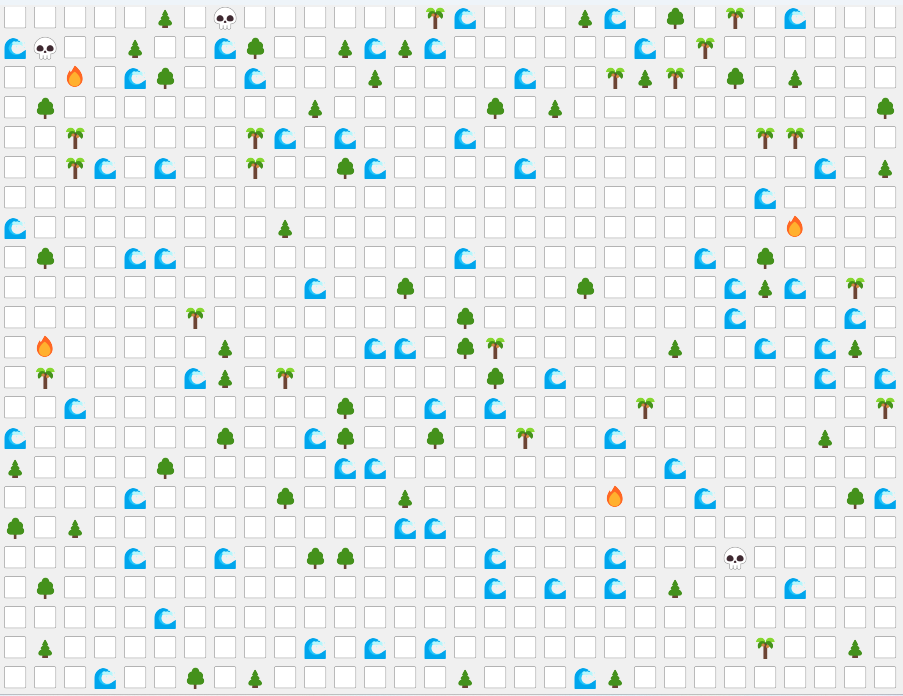

Figura 11: Estado inicial de la prueba 2

Al finalizar la simulación, no se pudo apreciar el avance del incendio como tal, por lo tanto, se debe seguir reduciendo la tasa de crecimiento.

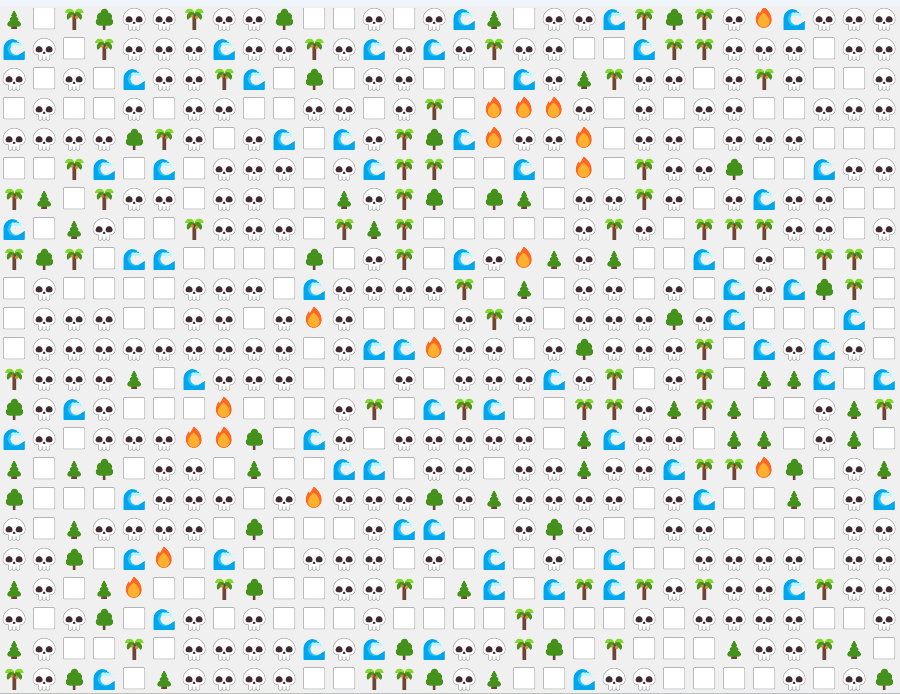

Figura 12: Estado final de la prueba 3

En esta prueba, se hizo evidente necesidad de implementar el código para el término de las simulaciones, pues en el código inicial se consideró un número infinito de simulaciones lo cual no resulta factible para mostrar los resultados de la simulación. Es imperativo realizar cambios para la parte del código que se muestra acontinuación.

In [ ]:
 [...]
    dibujar_bosque()
    ventana.after(100, Simulación)
Simulación() [...]

### PRUEBA 3

En base a las observaciones realizadas en la segunda prueba, se dispone variar la tasa de crecimiento de un árbol para visualizar mejor el avance del incendio. Además se redujo la probalilidad de incendio de los árboles vecinos para lograr un mayor dinamismo en la simulación.



*  Tasa de crecimiento: 0.01
*  Probalibilidad de incendio del árbol vecino : 0.05




In [ ]:
[...]
tasa_crecimiento = 0.01
probabilidad_quemarse_vecino = 0.05 [...]

También se agregó la función que indica que la simulación ha terminado.

In [ ]:
[...]
if SimulaciónTerminada()== True:
        print("Simulación terminada.")
        return
    ventana.after(100, Simulación)  [...]

Al término de esta prueba, se logró una mejor visualización del incendio así como su avance hasta que la mayoría de los árboles se hayan consumido.


Se vio conveniente realizar una prueba para asegurarnos de que la función implementada para definir el término de la simulación correctamente.

PRUEBA 4

Como se mencionó en la prueba 3, es necesario variar momentáneamente las tasa de crecimiento y la demás probailidades para notar el funcionamiento de la función que indica el término de la simulación.
En el siguiente fragmento del código se muestra que la simuluación termina cuando no queden espacios diferentes a los estados: "quemado" o "lago".

In [ ]:
def SimulaciónTerminada():
    for i in range (n):
        for j in range(m):
            if bosque[i][j]!=emoji_quemado and bosque[i][j] != emoji_lago:
                return False
    return True


Con las siguientes variaciones de las probabilidades, se espera que se haga notoria dicha condición.


In [ ]:
 [...]
 tasa_crecimiento = 0.9

probabilidad_quemarse_vecino = 1 [...]

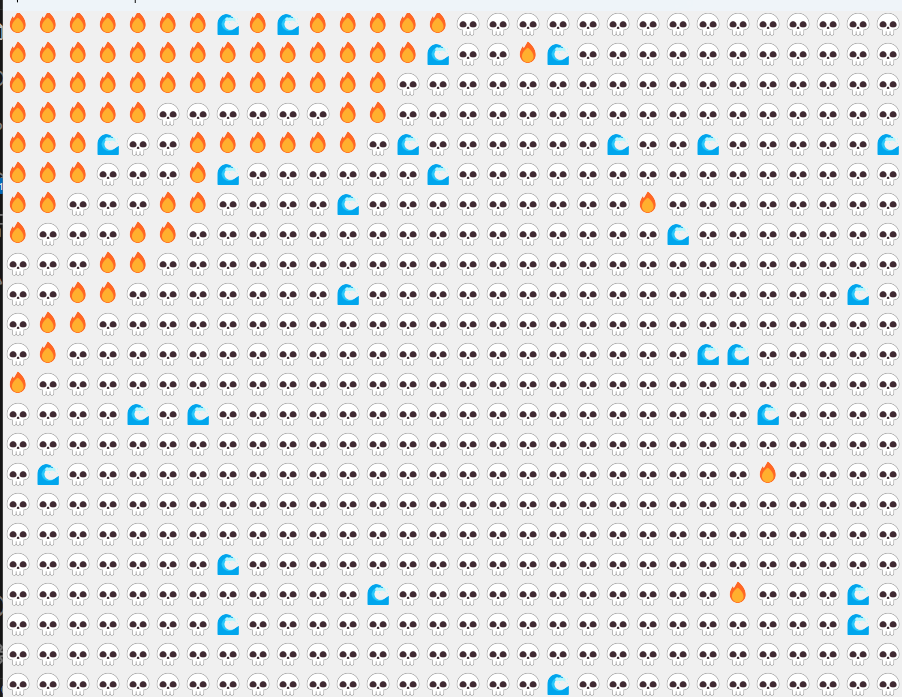

Figura 13: Estado inicial de la prueba 4

En esta prueba, se verifica el funcionamiento de la función "simulaciónTerminada",pues es notorio el final de la simulación, donde ya no quedan más árboles.


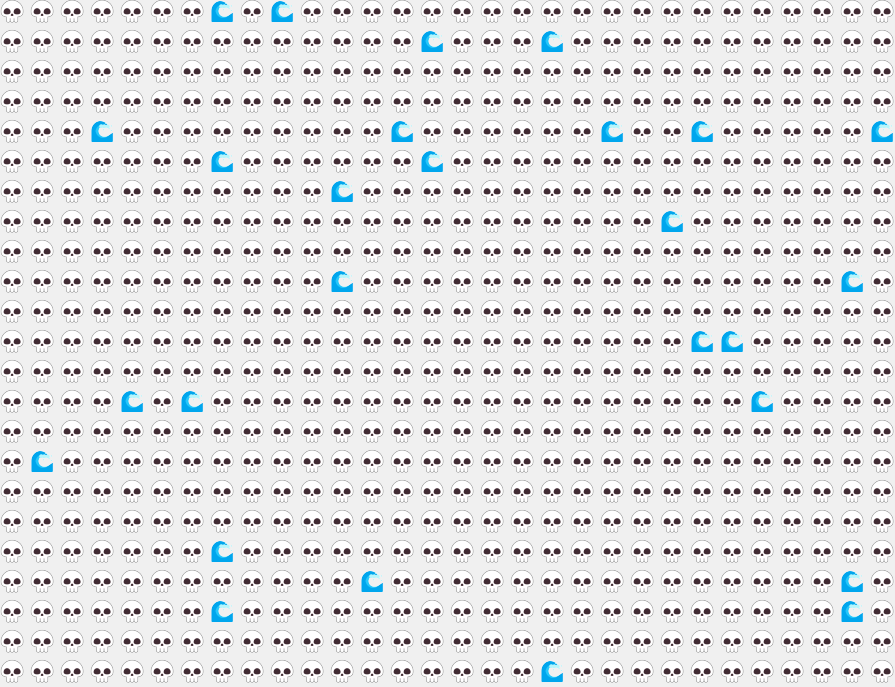

Figura 14: Resultados de la prueba 4

* **Observación importante**.

Se puede verificar las pruebas realizadas reemplazando las partes del código con los fragmentos descritos en la presente sección.



## CONCLUSIONES

Se logró desarrollar una simulación efectiva que describe el comportamiento de un incendio forestal en un bosque, teniendo en cuenta los parámetros que determinan su intensidad y duración. Aunque la simulación se simplificó en algunas probabilidades, demostró ser efectiva. Durante el desarrollo de esta simulación, se enfrentaron diversas dificultades, como la implementación de las clases y funciones necesarias en el código, y la mejora continua de la simulación. Al realizar pruebas, se concluyó que los parámetros definidos en la prueba tres muestran un comportamiento más cercano a un incendio real, lo que los convierte en los más óptimos.

## VERIFICACIÓN

En el repositorio de Github se incorporó el código en python con el nombre "Simulador_de_incendios_forestales.py", el cual contiene los datos de la prueba 4 mencionada en la sección *Pruebas*, la cual indica los siguientes datos considerados los más óptimos para una correcta simulación.


*   Tasa de crecimiento: 0.01
*   Probalibilidad de incendio del árbol vecino : 0.05



## BIBLIOGRAFÍA

Biblioteca del Congreso Nacional de Chile. (2017, abirl 24). Impacto de los incendios forestales en suelo, agua, vegetación y fauna.Cámara cl.

https://www.camara.cl/verDoc.aspx?prmTIPO=DOCUMENTOCOMUNICACIONCUENTA&prmID=39186#:~:text=Los%20principales%20impactos%20de%20los,org%C3%A1nica%2C%20alteraci%C3%B3n%20de%20la%20vegetaci%C3%B3n.

Causas y efectos de los incendios forestales. Fundacion aquae.

https://www.fundacionaquae.org/como-luchar-contra-incendios-forestales/

DJ Golicher (2003). Incendios forestales. Repositorio ECOSUR.

https://ecosur.repositorioinstitucional.mx/jspui/bitstream/1017/934/1/0000294111_documento.pdf

Naciones Unidas. (2022, febrero 16). Los incendios forestales aumentarán un 30% para 2050 y un 50% para fin de siglo. ONU Noticias.

https://news.un.org/es/story/2022/02/1504472

Secretaría de Medio Ambiente y Recursos Naturales. (s. f.). Impactos ambientales que provoca un incendio forestal. Gobierno de México.

https://www.gob.mx/semarnat/articulos/impactos-ambientales-que-provoca-un-incendio-forestal-142066

Stack Overflow. (2021). How to display colored emojis in tkinter. Stack Overflow. https://stackoverflow.com/questions/66183690/how-to-display-colored-emojis-in-tkinter







